/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:128: UserWarning: Use the colorbar set_ticks() method instead.



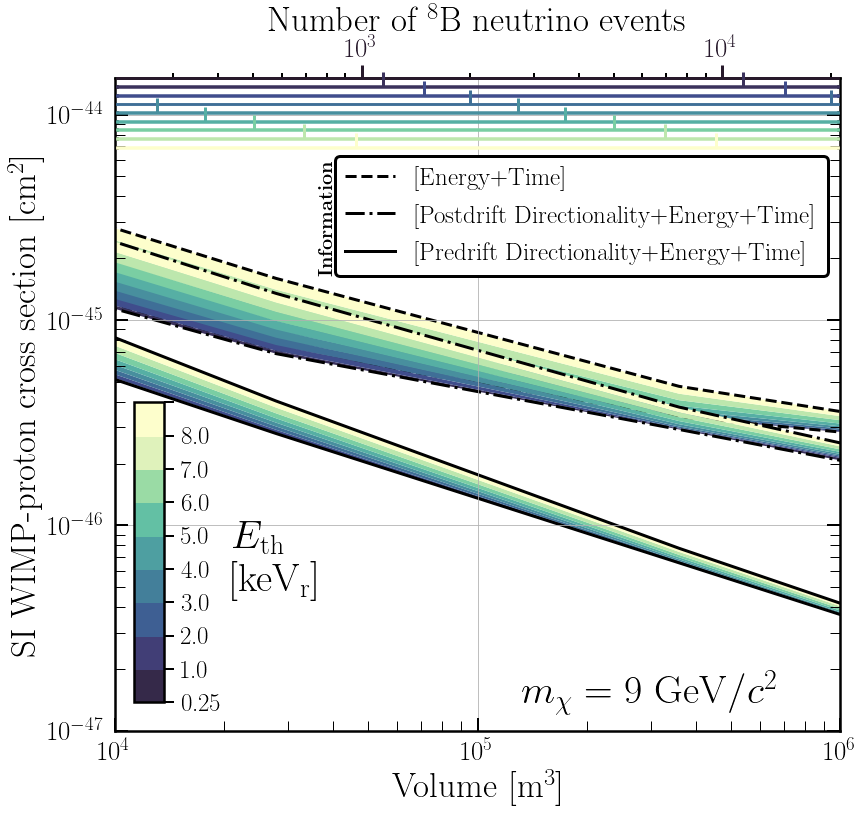

In [23]:
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean


plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=27)

fig, ax1 = plt.subplots()
fig.set_size_inches(13,12)


xmin = 1.0
xmax = 1.0e10
ymax = 1.5e-44
ymin = 1.0e-47

# C1 = loadtxt("../data/CYGNUS-Exposure-Nondirectional.txt")
# C2 = loadtxt("../data/CYGNUS-Exposure-Postdrift.txt")
# C0 = loadtxt("../data/CYGNUS-Exposure-NoEnergy.txt")

# V = C2[0,:]
# NB8 = C0[3,:]

# col1 = 'k'
# col0 = 'crimson'
# col2 = 'navy'

# ax1.loglog(V,C0[2,:],'.-',linewidth=3,color=col0,markersize=20)
# ax1.loglog(V,C1[2,:],'.-',linewidth=3,color=col1,markersize=20)
# ax1.loglog(V,C2[2,:],'.-',linewidth=3,color=col2,markersize=20)
# ax1.fill_between(V,C0[2,:],y2=C2[2,:],color='ForestGreen',alpha=0.3,edgecolor='none',zorder=-1)


# ax1.loglog(V,C0[1,:],'.-',linewidth=3,color=col0,markersize=20,label="Pixel (Time)")
# ax1.loglog(V,C1[1,:],'.-',linewidth=3,color=col1,markersize=20,label="Pixel (Time+Energy)")
# ax1.loglog(V,C2[1,:],'.-',linewidth=3,color=col2,markersize=20,label="Pixel (Time+Energy+Direction)")
# ax1.fill_between(V,C0[1,:],y2=C2[1,:],color='Orange',alpha=0.3,edgecolor='none',zorder=-1)

alph = 1.0
nths = 9
col = cmocean.cm.deep_r(linspace(0.0,1.0,nths))


def PlotRange(fname,lsty,zo):
    dat0 = loadtxt(fname)
    V = dat0[0,2:]
    sig0 = dat0[1:,2:]
    nths = shape(sig0)[0]
    for i in range(0,nths-1):
        ax1.fill_between(V,sig0[i,:],y2=sig0[i+1,:],color=col[i+1,:],lw=0,alpha=alph,zorder=zo)
        #ax1.loglog(V,sig0[i,:],'-',lw=3,color=col[i,:],zorder=zo+1)

    ax1.loglog(V,sig0[0,:],lsty,lw=3,color='k',zorder=zo)
    #ax1.loglog(V,sig0[0,:],lsty,lw=4,color=col[0,:],zorder=zo)
    ax1.loglog(V,sig0[-1,:],lsty,lw=3,color='k',zorder=zo)
    #ax1.loglog(V,sig0[-1,:],'-',lw=4,color=col[-1,:],zorder=zo)
    
    Nbg_1 = dat0[1:,0]
    Nbg_2 = dat0[1:,1]
    return V,Nbg_1,Nbg_2

V,Nbg_1,Nbg_2 = PlotRange("../data/CYGNUS-Exposure9GeV-Postdrift.txt",'-.',-1)    
V,Nbg_1,Nbg_2 = PlotRange("../data/CYGNUS-Exposure9GeV-Predrift-Nondirectional.txt",'--',-3) 
#V,Nbg_1,Nbg_2 = PlotRange("../data/CYGNUS-Exposure9GeV-Predrift-NoEnergy.txt",':',-2) 
V,Nbg_1,Nbg_2 = PlotRange("../data/CYGNUS-Exposure9GeV-Predrift.txt",'-',0)    
    
    
# Legend
#ax1.plot(-1,-1,':',color='k',lw=3,label=r'[Time]')
ax1.plot(-1,-1,'--',color='k',lw=3,label=r'[Energy+Time]')
ax1.plot(-1,-1,'-.',color='k',lw=3,label=r'[Postdrift Directionality+Energy+Time]')
ax1.plot(-1,-1,'-',color='k',lw=3,label=r'[Predrift Directionality+Energy+Time]')

leg1 = ax1.legend(fontsize=25,frameon=True,loc="upper right",framealpha=1,bbox_to_anchor=[1.0,0.9])
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

# Vertical line
#ax1.loglog([1e4,1e4],[ymin,ymax],'k-')
#ax1.text(4000,1e-41,r'{\bf CYGNUS-10k}',fontsize=25,rotation=90,verticalalignment='top')

Vmin = 1.0e4
Vmax = 1.0e6

# Labels
#ax2.set_xlabel(r"Number of neutrino events",fontsize=35,labelpad=15)
ax1.set_ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)
ax1.set_xlabel(r'Volume [m$^3$]',fontsize=35)  # we already handled the x-label with ax1
ax1.set_xlim([Vmin,Vmax])


# Arrows
# plt.gcf().text(0.62,0.58,r'$m_\chi = 10$ GeV',fontsize=35,color='Orange')
# plt.gcf().text(0.64,0.21,r'$m_\chi = 100$ GeV',fontsize=35,color='ForestGreen')
# ax1.arrow(0.75, 0.16, 0.04, 0.08, transform=ax1.transAxes,
#           length_includes_head=True,width=0.005,lw=1.5,
#           head_width=0.03, head_length=0.03, overhang=0.4,
#           edgecolor='k',facecolor='ForestGreen',zorder=100)
# ax1.arrow(0.8, 0.6, -0.04, -0.08, transform=ax1.transAxes,
#           length_includes_head=True,width=0.005,lw=1.5,
#           head_width=0.03, head_length=0.03, overhang=0.4,
#           edgecolor='k',facecolor='Orange',alpha=0.5,zorder=100)

# Style
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(bottom=ymin, top=ymax)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)


# Custom colorbar
thb = append(0.25,arange(1,10))
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax1, width="15%", height="30%", bbox_to_anchor=[-20, -550, 200, 1000]) 
norm = mpl.colors.Normalize(vmin=0,vmax=8)
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.deep_r, norm=norm)
sm.set_array([])
cbar1 = plt.colorbar(sm,cax=cbaxes,ticks=thb,boundaries=thb,orientation='vertical')
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticks(thb[0:-1])
cbar.set_yticklabels(thb[0:-1])  # vertically oriented colorbar
cbar.tick_params(labelsize=25) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
cbar1.solids.set_edgecolor("face")
cbar1.solids.set_rasterized(True) 


plt.gcf().text(0.25,0.33,r'$E_{\rm th}$',fontsize=40,color='k')
plt.gcf().text(0.25,0.28,r'[keV$_{\rm r}]$',fontsize=40,color='k')
plt.gcf().text(0.342,0.655,r'{\bf Information}',fontsize=20,color='k',rotation=90)
plt.gcf().text(0.56,0.15,r'$m_\chi = 9$ GeV$/c^2$',fontsize=40)

ntx = 10.0**array([-1,0,1,2,3,4,5,6,7,8])


ax2 = fig.add_axes([0.1275, 0.88, 0.77, 0.0000001])
ax2.set_yticks([])
ax2.set_xscale('log')
ax2.set_xticks(ntx)
ax2.xaxis.tick_top()
ax2.set_xlim([Nbg_1[0]*Vmin/V[0],Nbg_1[0]*Vmax/V[0]])
ax2.spines['bottom'].set_color(col[0,:])
ax2.spines['top'].set_color(col[0,:])
ax2.xaxis.label.set_color(col[0,:])
ax2.tick_params(axis='x', colors=col[0,:])
ax2.tick_params(which='major',direction='out',width=3,length=13,bottom=False,top=True)
ax2.tick_params(which='minor',direction='out',width=2,length=5,bottom=False,top=True)
plt.title(r"Number of $^8$B neutrino events",fontsize=35)

for i in range(1,nths):
    ax2 = fig.add_axes([0.1275, 0.88-i*1.0/100.0, 0.77, 0.001])
    ax2.set_yticks([])
    ax2.set_xscale('log')
    ax2.xaxis.tick_top()
    ax2.set_xticks(ntx)
    ax2.set_xticklabels([])
    ax2.set_xlim([Nbg_1[i]*Vmin/V[0],Nbg_1[i]*Vmax/V[0]])
    ax2.spines['bottom'].set_color(col[i,:])
    ax2.spines['top'].set_color(col[i,:])
    ax2.xaxis.label.set_color(col[i,:])
    ax2.tick_params(axis='x', colors=col[i,:])
    ax2.tick_params(which='major',direction='out',width=3,length=14,bottom=False,top=True)
    ax2.tick_params(which='minor',direction='out',width=3,length=0,bottom=False,top=True)

plt.show()

plt.show()
fig.savefig('../plots/CYGNUS-indivMass.pdf',bbox_inches='tight')


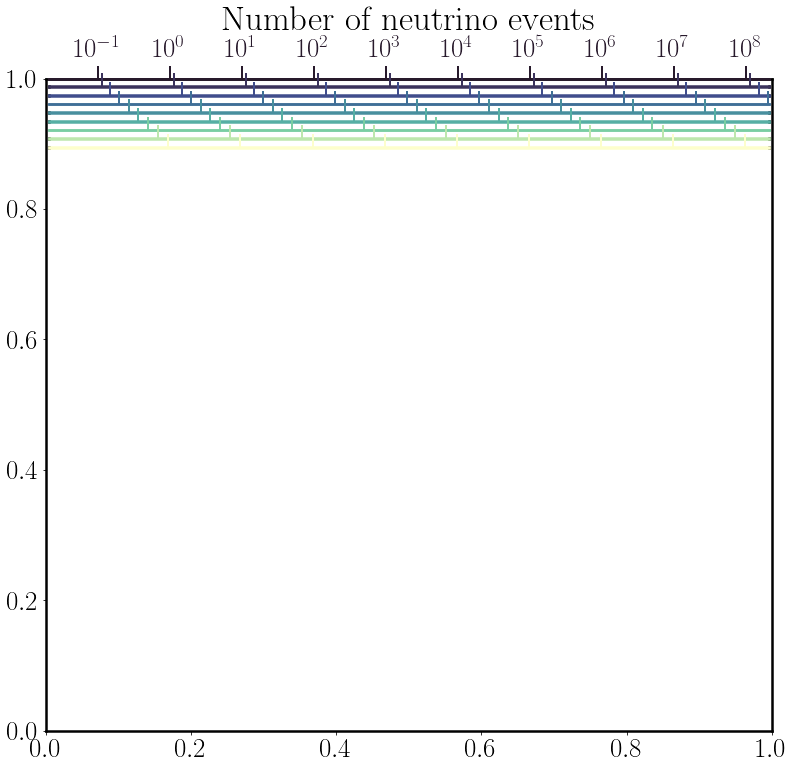

In [226]:
fig, ax1 = plt.subplots()
fig.set_size_inches(13,12)

ntx = 10.0**array([-1,0,1,2,3,4,5,6,7,8])


ax2 = fig.add_axes([0.1275, 0.88, 0.77, 0.0000001])
ax2.set_yticks([])
ax2.set_xscale('log')
ax2.set_xticks(ntx)
ax2.xaxis.tick_top()
ax2.set_xlim([Nbg_1[0],1e10*Nbg_1[0]])
ax2.spines['bottom'].set_color(col[0,:])
ax2.spines['top'].set_color(col[0,:])
ax2.xaxis.label.set_color(col[0,:])
ax2.tick_params(axis='x', colors=col[0,:])
ax2.tick_params(which='major',direction='out',width=2,length=13,bottom=False,top=True)
ax2.tick_params(which='minor',direction='out',width=1,length=10,bottom=False,top=True)
plt.title(r"Number of neutrino events",fontsize=35)

for i in range(1,nths):
    ax2 = fig.add_axes([0.1275, 0.88-i*1.0/100.0, 0.77, 0.001])
    ax2.set_yticks([])
    ax2.set_xscale('log')
    ax2.xaxis.tick_top()
    ax2.set_xticks(ntx)
    ax2.set_xticklabels([])
    ax2.set_xlim([Nbg_1[i],1e10*Nbg_1[i]])
    ax2.spines['bottom'].set_color(col[i,:])
    ax2.spines['top'].set_color(col[i,:])
    ax2.xaxis.label.set_color(col[i,:])
    ax2.tick_params(axis='x', colors=col[i,:])
    ax2.tick_params(which='major',direction='out',width=2,length=13,bottom=False,top=True)
    ax2.tick_params(which='minor',direction='out',width=1,length=10,bottom=False,top=True)
plt.show()

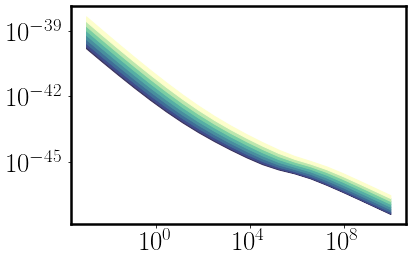

In [197]:
dat0 = loadtxt("../data/CYGNUS-Exposure6GeV-Postdrift.txt")
V = dat0[0,:]
sig0 = dat0[1:,:]

for i in range(0,nths-1):
    plt.fill_between(V,sig0[i,:],y2=sig0[i+1,:],color=col[i+1,:])
    
plt.xscale('log')
plt.yscale('log')
plt.show()

In [215]:
Nbg_2/Nbg_1

array([1.00000003e+10, 1.00000003e+10, 1.00000003e+10, 1.00000003e+10,
       1.00000003e+10, 1.00000003e+10, 1.00000003e+10, 1.00000003e+10,
       1.00000003e+10])